<h1 style="font-size:3rem;color:orange;">Midterm 2</h1>

# Problem 1
####  This problem will involve logistic regression on the dataset midterm data 2.csv. The response column is response and all other columns are features.

#### (a) (5 points) Load the dataset. Remove any unnecessary columns. For any columns that have NA values, fill in the NA values with the median over all non-missing entries in the columns. Format all columns with string entries as categorical variables. Make response a categorical variable. Split the dataset into a training set (75% of observations) and validation set (25% of observations).

In [1]:
#%% Step 1 - Load and Clean Data
import pandas as pd;
#temp names to better work with OLS logistic regression ouput
colnames=['row','response', 'a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i'] 
file_path = 'C:/Users/danma/Downloads/midterm_data_2.csv'
df = pd.read_table(file_path, sep=",",names=colnames)
df = df.iloc[1: , :]
df = df.loc[:, df.columns != 'row']
del file_path

#get median from columns after dropping NA
nan_values = df[df.isna().any(axis=1)]
print("\nFinding NaN values that have to be replaced in the dataframe")
print(nan_values)
print("\nAfter printing we can see that feat.b and feat.d are only rows with nan values. So we take the median of the dropped NA dataframe and fill those nan with medians.")
df_no_NA = df.dropna()
#go back on original and load NAs with Median Value
values = {"b": df_no_NA["b"].median(), "d": df_no_NA["d"].median()}
df = df.fillna(value=values)
#reassign values
df[['d','response']] = df[['d','response']].astype(int)
df[['a','b','e','f','h','i']] = df[['a','b','e','f','h','i']].astype(float)
del df_no_NA, nan_values, values
#%% Step 2 - Format feat.c and feat.g as Categorical
from sklearn.preprocessing import OneHotEncoder;
oe = OneHotEncoder()
#encode C
encoded_C = oe.fit_transform(df[["c"]])
encoded_C = pd.DataFrame(encoded_C.toarray(),columns=["c_a","c_b","c_c","c_d"])
df = df.join(encoded_C,how='left')
#encode G
encoded_G = oe.fit_transform(df[["g"]])
encoded_G = pd.DataFrame(encoded_G.toarray(),columns=["g_x","g_y","g_z"])
df = df.join(encoded_G,how='left')
#drop original categorical columns
df = df.loc[:, df.columns != "c"]
df = df.loc[:, df.columns != "g"]
#drops na values
df = df.dropna()
print("\nFinal Data Frame (after encoding categorical columns):\n",df.head())
del encoded_C, encoded_G, oe
#%% Step 3 - Split Data
#split into  and Y
x = df.loc[:, df.columns != 'response']
y = df['response']
#turns y into a 1-d array instead of a dataframe column for logistic regression
y = y.to_numpy()
y = y.ravel()
#split into train test split
from sklearn.model_selection import train_test_split as TTS;
TS = 0.25 #for tuning
print("\nTest Size = ", TS, "\n")
train, test = TTS(df, test_size=0.25)
x_train = train.loc[:, df.columns != 'response']
y_train = train['response']
x_test = test.loc[:, df.columns != 'response']
y_test = test['response']


Finding NaN values that have to be replaced in the dataframe
    response                   a                  b  c    d  \
12         1    2.07944148117209                NaN  a    1   
23         1   -2.07801334492172   -1.9021419904938  a  NaN   
45         1    4.62388599491497                NaN  a    1   
49         1    3.33989535500895  -1.37236427536683  a  NaN   
134        1  -0.267490497018875  -5.47355595390678  c  NaN   
203        1   0.204564829910941                NaN  d    0   
209        0    5.95272240201007  -4.73429930681862  a  NaN   
222        1    2.85395745149959  -5.48939252463402  d  NaN   
244        0   -2.41191086199724                NaN  b    0   
405        1    3.01208790620179  -3.65857759008987  a  NaN   
502        0   -1.98109577329614                NaN  c    0   
689        0  0.0360254734948302  -6.01443626601951  c  NaN   
700        1   -3.84211836985736                NaN  c    1   
785        0   -2.95466218237726  -3.69977968708787  c  

#### (b) (5 points) Make a model using all features. Narrow down your features to make a reduced model that uses only the most relevant predictors.

Complete Logistic Regression Feature Importance:

Feature Importance Ranking


[False False  True  True  True False  True  True  True False False False
  True False]
a Score: 0.01475
b Score: 0.04122
d Score: 0.38289
e Score: 0.18198
f Score: 0.36072
h Score: 0.02647
i Score: 0.21246
c_a Score: 0.02297
c_b Score: 0.19148
c_c Score: 0.08699
c_d Score: 0.12980
g_x Score: 0.18612
g_y Score: 0.18753
g_z Score: 0.00093


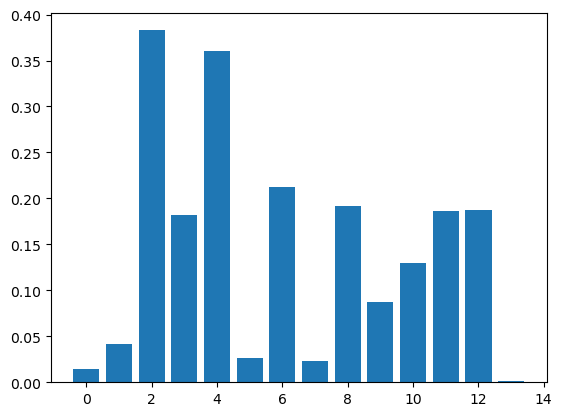

Optimization terminated successfully.
         Current function value: 0.364904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                  749
Model:                          Logit   Df Residuals:                      736
Method:                           MLE   Df Model:                           12
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                  0.4688
Time:                        20:10:54   Log-Likelihood:                -273.31
converged:                       True   LL-Null:                       -514.56
Covariance Type:            nonrobust   LLR p-value:                 1.176e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
a              0.0139      0.037      0.377      0.706      -0.058       0.086
b             -0.0413      0.

In [2]:
#%% Step 4 - Create Full and Reduced Model
print("Complete Logistic Regression Feature Importance:")
from sklearn.linear_model import LogisticRegression;
from matplotlib import pyplot
#using newton-cg to mitigate error with number of samples on default
completemodel = LogisticRegression(max_iter=5000).fit(x_train, y_train)

from sklearn.feature_selection import RFE
rfe = RFE(completemodel, n_features_to_select=7)
rfe.fit(x, y)
print("\nFeature Importance Ranking\n\n")
print(rfe.support_)

# Get Importance
importance = completemodel.coef_[0]

colnames = list(x_train.columns)
# summarize feature importance
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (abs((v))))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], abs(importance))
pyplot.show()

del i, v, importance, colnames, rfe
#%% Step 5 - Create Linear Model and Show Summary Screen
import statsmodels.api as sm;

completemodel = sm.Logit(y_train,x_train).fit()
print(completemodel.summary())

<h1 style="font-size:1.5rem;color:blue;">After testing for feature importance, viewing the p-values, and testing with feature selection we see that feat.d and feat.f are the most relevant predictors while feat.e, and feat.i both passed 2 out of 3 selection methods. Therefore our reduce model will contain features d,e,f,i.</h1>

In [3]:
#%% Step 6 - Create a Reduced Model
import statsmodels.formula.api as smf

reducedmodel = smf.logit('response ~ d + e + f + i', data=train).fit()
print(reducedmodel.summary())

Optimization terminated successfully.
         Current function value: 0.367865
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                  749
Model:                          Logit   Df Residuals:                      744
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                  0.4645
Time:                        20:10:54   Log-Likelihood:                -275.53
converged:                       True   LL-Null:                       -514.56
Covariance Type:            nonrobust   LLR p-value:                3.729e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4556      0.234     10.498      0.000       1.997       2.914
d              0.4141      0.

#### (c) (5 points) Create an ROC curve for your full and reduced model on both the training and validation sets (4 curves in all). Comment on the degree of overfitting for validation performance vs. training performance and the adequacy of your reduced model compared to your full model.

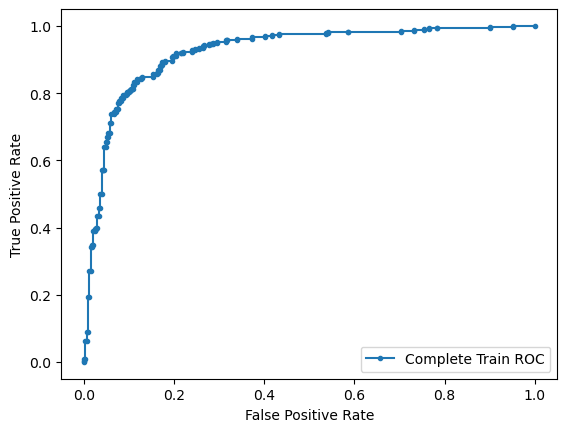

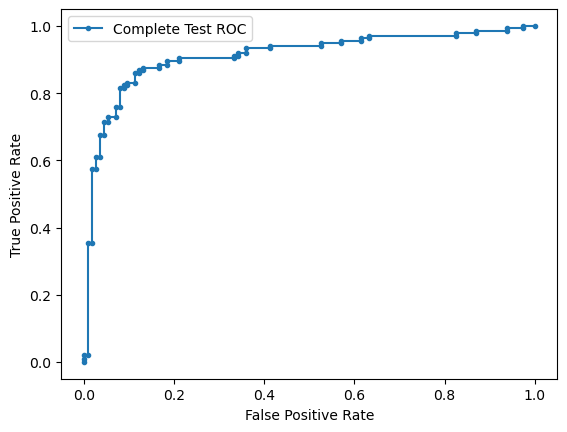

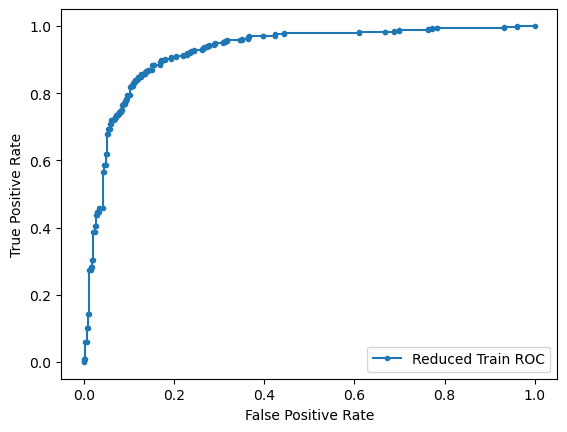

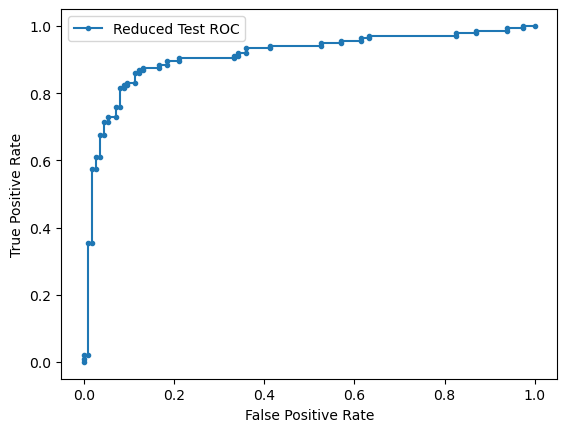



AUC Score Results:

╒═════╤══════════════════╤═════════════════╤═════════════════╤════════════════╕
│     │   Complete Train │   Complete Test │   Reduced Train │   Reduced Test │
╞═════╪══════════════════╪═════════════════╪═════════════════╪════════════════╡
│ AUC │          0.92325 │        0.911765 │        0.922102 │       0.914796 │
╘═════╧══════════════════╧═════════════════╧═════════════════╧════════════════╛


In [4]:
#%% Step 7 - Create ROC Curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Complete Model Training
comp_train_pred = completemodel.predict(x_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train.astype('int32'), comp_train_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete Train ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#to create summary table at the end
from tabulate import tabulate

data = {'Complete Train': [roc_auc_score(y_train.astype('int32'), comp_train_pred)]}
table = pd.DataFrame(data)

#Complete Model Testing
comp_test_pred = completemodel.predict(x_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), comp_test_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete Test ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Complete Test': [roc_auc_score(y_test.astype('int32'), comp_test_pred)]}
table['Complete Test'] = pd.DataFrame(data)

#Reduced Model Training
red_train_pred = reducedmodel.predict(x_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train.astype('int32'), red_train_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced Train ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Reduced Train': [roc_auc_score(y_train.astype('int32'), red_train_pred)]}
table['Reduced Train'] = pd.DataFrame(data)

#Reduced Model Testing
red_test_pred = reducedmodel.predict(x_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), comp_test_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced Test ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Reduced Test': [roc_auc_score(y_test.astype('int32'), red_test_pred)]}
table['Reduced Test'] = pd.DataFrame(data)

print("\n\nAUC Score Results:\n")

print(tabulate(table, headers='keys',tablefmt='fancy_grid',showindex=["AUC"]))

del comp_test_pred, comp_train_pred, fpr, red_test_pred, red_train_pred, thresholds, tpr, data, table

<h1 style="font-size:1.5rem;color:blue;">Both models appear to have similar degrees of fitting, where the gaps between the AUC's are .01. This gap is found between the validation/test and training AUC's from their ROC curve. Having said that, neither model shows a degree of overfitting due to having a small gap between AUC's. Seeing as the results were very simliar both complete and reduced appear adequate, but one would choose the reduced as it is the more parsimonious.</h1>

#### (d) (5 points) Using your reduced model, perform predictions for P(response = 1|features) for the validation set. Perform predictions for the binary response by thresholding your predicted probabilities P(response = 1|features) at two different values: 0.5 and 0.65. Calculate the overall prediction accuracy for both thresholds. Calculate the False Negative Rate for both thresholds.

In [5]:
#%% Step 8 - Threshold Comparison
from sklearn.metrics import accuracy_score
# Predicted probability
y_predict_prob = reducedmodel.predict(x_test)
print("Define threshold 0.5")
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_predict_prob]
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_predict_class)
FN = CM[1][0]
print("False Negative Rate",FN)

print("\nDefine threshold 0.65")
y_predict_class = [1 if prob > 0.65 else 0 for prob in y_predict_prob]
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3))
CM = confusion_matrix(y_test, y_predict_class)
FN = CM[1][0]
print("False Negative Rate",FN)

Define threshold 0.5
Accuracy: 0.864
False Negative Rate 20

Define threshold 0.65
Accuracy: 0.832
False Negative Rate 35


#### (e) (5 points) Make two altered copies of your validation set: one where feat.d is set to 1 for all rows, and another where feat.d is set to 0 for all rows. All other columns should remain the same as your original validation set. Using your reduced model, perform predictions for P(response = 1|features) for both altered validation sets, and average the predicted probabilities across all validation observations (end up with 2 average probabilities, one for each altered dataset). Finally, calculate the difference between these average probabilities (either order for the subtraction is OK). How can you interpret the average difference that you have found?

In [6]:
#%% Step 9 - feat.d Manipulation

print("feat.d set to 0 results:")
d_set_0 = x_test.assign(d=0)
y_predict_prob0 = reducedmodel.predict(d_set_0)
print("Prediction Probability Average:",round(y_predict_prob0.mean(),4))

print("\nfeat.d set to 1 results:")
d_set_1 = x_test.assign(d=1)
y_predict_prob1 = reducedmodel.predict(d_set_1)
print("Prediction Probability Average:",round(y_predict_prob1.mean(),4))

print("\nDifference Between Probabilities ",round((y_predict_prob1.mean() - y_predict_prob0.mean()),4))

feat.d set to 0 results:
Prediction Probability Average: 0.4952

feat.d set to 1 results:
Prediction Probability Average: 0.5437

Difference Between Probabilities  0.0484


<h1 style="font-size:1.5rem;color:blue;">We can interpret this small average difference by saying that feat.d has a similar probability in being 1 as it is 0, therefore showing the feat.d is almost evenly distributed when viewing predictions based off of the column. Due to it having a higher probability for 1 we can assume that there are more 1's for feat.d for accuracys sake.</h1>